In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# Load the Boston House Pricing Dataset
df = pd.read_csv('Dataset/HousingData.csv')

In [9]:
# rename the target 'MEDV'
df.rename(columns = {'MEDV':'Price'}, inplace=True)

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.info()

# EDA A BIT

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [12]:
## Summarizing the Stats of the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
# Check Missing Values and drop them since want to be fast

df.dropna(inplace=True)

df.shape

(394, 14)

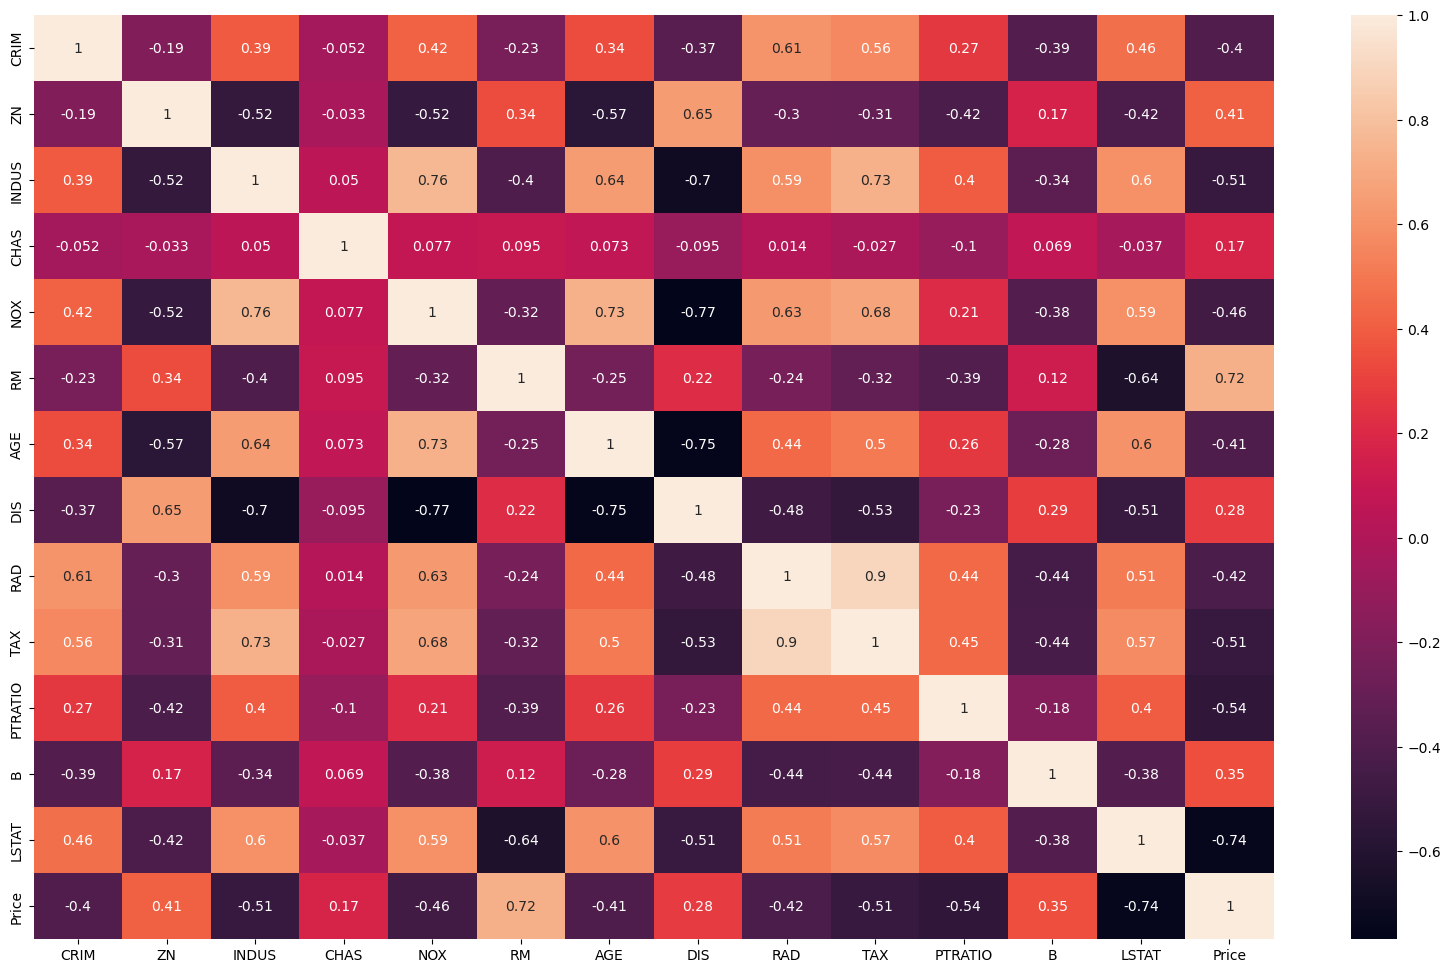

In [21]:
##  EDA

## Correlation -> important for linear regression,
plt.figure(figsize = (20,12))

hm = sns.heatmap(data=df.corr(), 
                annot=True) 
  
# displaying the plotted heatmap 
plt.show() 

Text(0, 0.5, 'Price')

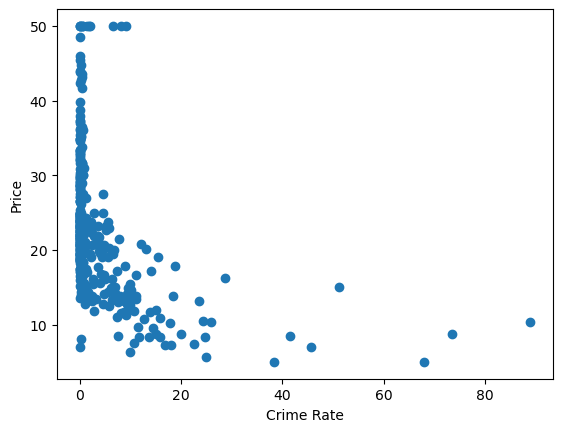

In [24]:
# check the scatter plot
plt.scatter(df['CRIM'], df['Price'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

<Axes: xlabel='RM', ylabel='Price'>

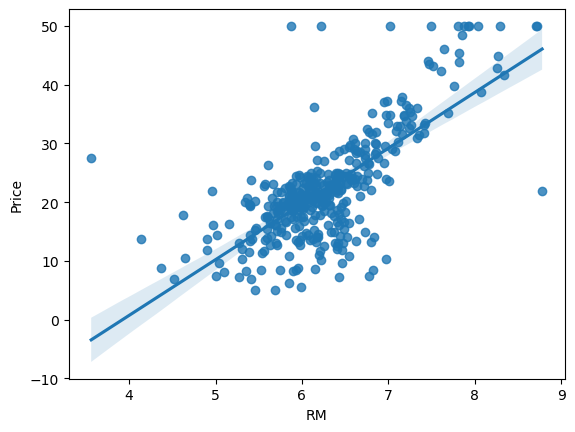

In [25]:
# check reg line
sns.regplot(x="RM", y="Price", data=df)

# Data Preparation

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
# Define Feature vs Target

X = df.iloc[:,:-1].copy() #select all row, select all column without last
y = df.iloc[:,-1].copy()

In [29]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(315, 13)
(315,)
(79, 13)
(79,)


In [32]:
# Standardize Dataset

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Model Training

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [33]:
from sklearn.linear_model import LinearRegression


regression = LinearRegression()

In [34]:
regression.fit(X_train, y_train)

LinearRegression()

In [37]:
## print the coefficient and the intercept

print(regression.coef_) # coefficient
print(regression.intercept_)

[-1.09299765  0.97431655  0.17589472  0.51612013 -1.98125482  2.99665496
 -0.61026711 -2.94464351  2.06984891 -2.07443678 -2.0915885   0.89475279
 -2.94995322]
21.993333333333336


In [38]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [39]:
# Prediction with test data

reg_pred = regression.predict(X_test)
reg_pred

array([29.22850199, 17.5037472 , 21.80803847, 30.4942528 , 18.50265527,
       34.7432311 , 22.07369779, 30.7541295 , 33.52029866, 14.82910783,
       22.14507214, 41.26427356, 22.51242483, 16.87300668, 19.0023074 ,
       20.77110711, 17.26921288, 15.48568273, 22.69482862, 14.12652975,
       18.19319969, 20.48292217, 17.04235173, 29.66737037, 26.09718411,
       16.06132841, 27.09746911, 31.45656662, 22.64238912, 27.06681913,
       41.10181897, 18.21320236, 23.062681  , 17.41202659, 17.39546606,
       21.076803  , 22.38598488, 21.66963934, 22.9118984 , 20.80249561,
       27.70046219, 34.60121409, 22.25931447, 30.83868791, 35.33229137,
       19.76393425, 24.99195034, 10.39133132, 19.75538217, 25.31114768,
       21.55934818, 25.89776968, 14.23212614, 18.66822307, 18.34126683,
       24.31756905, 43.40891373, 22.87668508, 15.3452895 , 23.17268086,
       21.11796307, 21.4821572 , 14.66508216, 28.92300146, -3.71655126,
       32.60224615, 16.81628299, 31.90077457, 24.78013157, 20.11

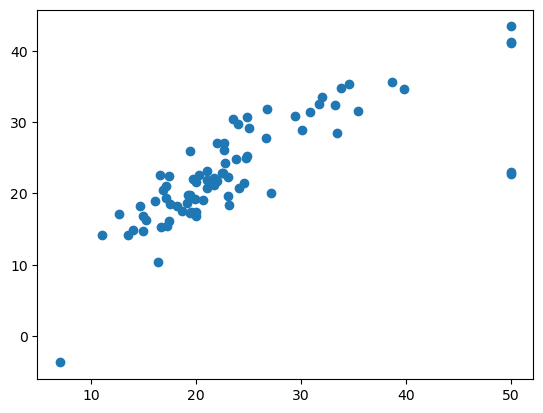

In [41]:
## plot a scatter plot for the prediction

plt.scatter(y_test, reg_pred)

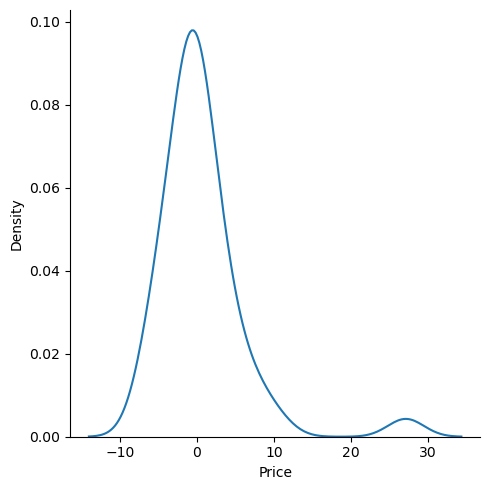

In [43]:
# Residuals / Errors

residuals = y_test - reg_pred


# plot the residuals
sns.displot(residuals, kind='kde') 


# when plot the residuals try, adjust the graf to get normal distributed


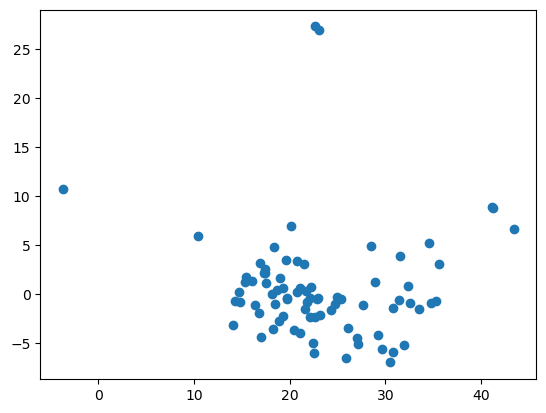

In [44]:
# Scatter plot with respects to prediction and residuals
# uniform distribution

plt.scatter(reg_pred, residuals)

In [46]:
# check the error

print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

3.3679832251542403
31.454047664950856
5.608390826694485


# More Metrics

In [ ]:
# skipp

In [59]:
df.iloc[0,:-1].values.reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

# New Data Prediction

In [65]:
# reshape the test and apply scalar

test_val = df.iloc[0,:-1].values.reshape(1,-1)
test_val = scaler.transform(test_val)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [66]:
regression.predict(test_val)

array([29.66737037])

# Pickle the Model

In [67]:
import pickle

pickle.dump(regression, open('regmodel.pkl', 'wb'))


In [68]:
# load pickle file
pickle_model = pickle.load(open('regmodel.pkl','rb'))

In [69]:
pickle_model.predict(test_val)

array([29.66737037])